# Compute  PCA : Method 1 for Brown

- use PCA scikit learn from scikit learn

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/01/08
- last update : 2023/01/08

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [3]:
from sklearn.decomposition import NMF, FastICA, PCA

In [4]:
from astropy.io import fits

## Start

In [5]:
cwd=os.path.abspath("")
main_dir = cwd
print(f"notebook current executing path : {cwd}")

notebook current executing path : /Users/dagoret/MacOSX/GitHub/LSST/PhotoZ_PhD/PCA


## Read file

In [6]:
filename = 'datatools/pca_Brown_data.fits'
hdu = fits.open(filename)
data_in=hdu[0].data
hdr_in = hdu[0].header

In [7]:
data_in

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        9.99800000e+03, 9.99900000e+03, 1.00000000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.03763947e-04, 1.03748627e-04, 1.03733348e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.88233135e-05, 3.88332621e-05, 3.88435206e-05],
       ...,
       [1.26000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        1.39312136e-05, 1.39253811e-05, 1.39195487e-05],
       [1.27000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        3.46938972e-05, 3.46868270e-05, 3.46797569e-05],
       [1.28000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        2.45502918e-05, 2.45356280e-05, 2.45209643e-05]])

In [8]:
NSED = data_in.shape[0]-3
NWL = data_in.shape[1]-1

In [9]:
wavelengths = data_in[0,1:] 
flambdas_average = data_in[1,1:] 
flambdas_std = data_in[2,1:] 
spec = data_in[3:,1:] 
all_numbers = data_in[3:,0] 

In [10]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_34496/1659706449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Flux average')

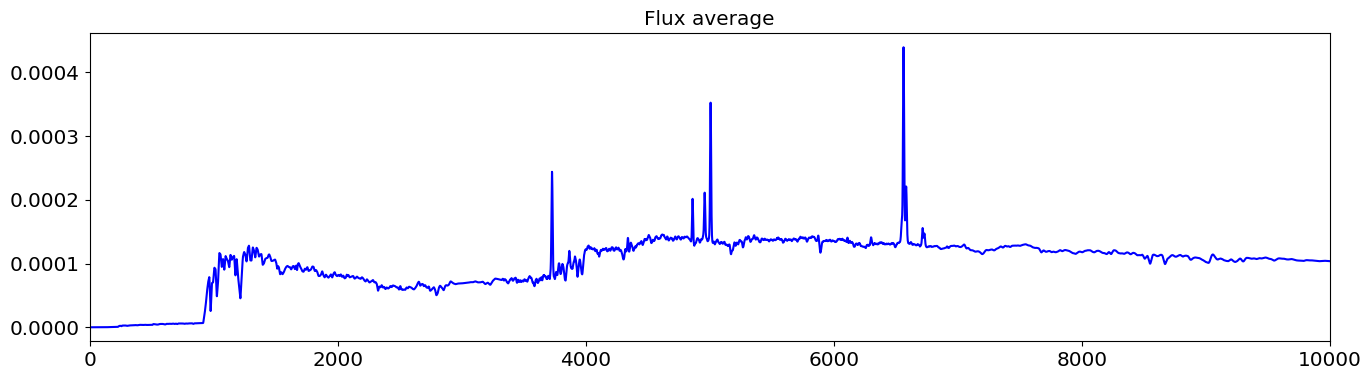

In [11]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-')
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")

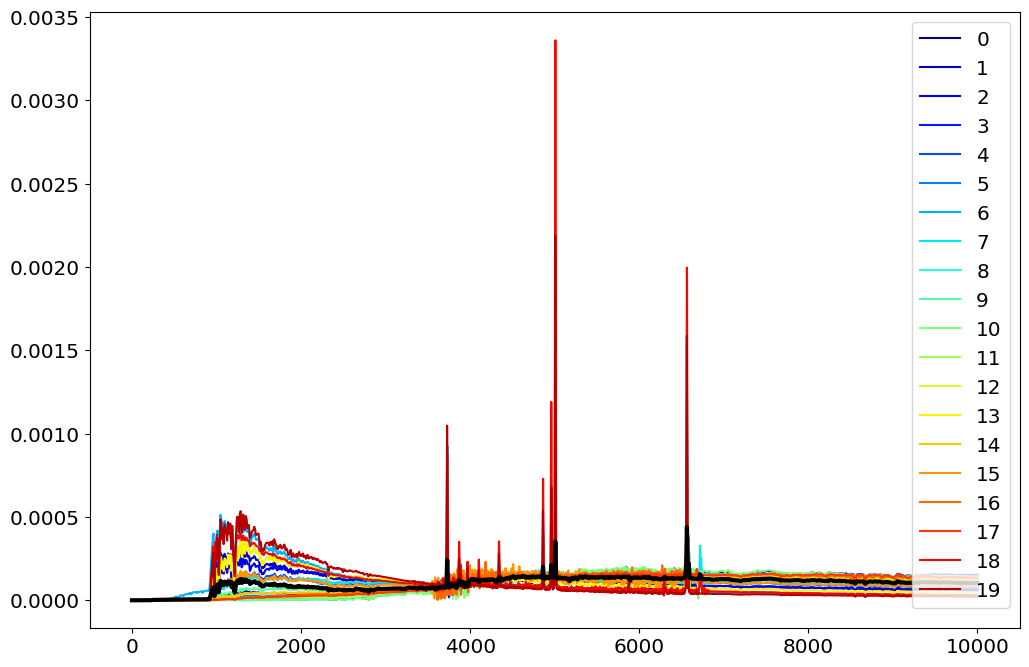

In [12]:
# wavelength bin colors
NTOPLOT=20
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)


fig = plt.figure(figsize=(12, 8))

for idx in np.arange(20):
    plt.plot(wavelengths,spec[idx,:],color=all_colors[idx],label=str(idx))

plt.legend()
spec_mean = spec.mean(0)
plt.plot(wavelengths,spec_mean,"k-",lw=3)
#plt.ylim(0,50.)

## Principal Component Analysis


https://www.astroml.org/astroML-notebooks/chapter7/astroml_chapter7_Dimensionality_Reduction.html


#### Derivation of principal component analyses

Set of data $X$: $N$ observations by $K$ measurements

Center data by subtracting the mean 

The covariance is

$$ C_X=\frac{1}{N-1}X^TX,$$

$N-1$ as the sample covariance matrix.

We want a projection, $R$,  aligned with the directions of maximal variance ($Y= X R$) with covariance 

$$C_{Y} = R^T X^T X R = R^T C_X R$$

Derive  principal component by maximizing its variance (using Lagrange multipliers and constraint)

$$\phi(r_1,\lambda_1) = r_1^TC_X r_1 - \lambda_1(r_1^Tr_1-1)$$

derivative of $\phi(r_1,\lambda)$ with respect to $r_1$ set to 0

$$C_Xr_1 - \lambda_1 r_1 = 0$$

$\lambda_1$ is the root of the equation $\det(C_X -
\lambda_1 {\bf I})=0$ and the largest eigenvalue

$$\lambda_1 =  r_1^T C_X r_1$$

Other  principal components  derived by
applying additional constraint that components are uncorrelated (e.g., $r^T_2 C_X r_1 = 0$).

#### Singular value decomposition (SVD)
Common approach is eigenvalue decomposition of the covariance or correlation matrix,
or singular value decomposition (SVD) of the data matrix

$$U \Sigma V^T = \frac{1}{\sqrt{N - 1}} X$$

columns of $U$ are  _left-singular vectors_

columns of $V$ are the _right-singular vectors_

The columns of $U$ and $V$ form orthonormal bases ($U^TU = V^TV = I$)

Covariance matrix is

$$
  C_X = \left[\frac{1}{\sqrt{N - 1}}X\right]^T \left[\frac{1}{\sqrt{N - 1}}X\right]\nonumber\\
      = V \Sigma U^T U \Sigma V^T\nonumber\\
      = V \Sigma^2 V^T.
$$

right singular vectors $V$ are the principal components so principal from the SVD of $X$ dont need $C_X$.

In [13]:
#https://www.astroml.org/astroML-notebooks/chapter7/astroml_chapter7_Dimensionality_Reduction.html
#https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca
"""
X_recons: ndarray, shape = (n_samples, n_features)       data with masked regions reconstructed
mu: ndarray, shape = (n_features,)                       mean of data
evecs: ndarray, shape = (min(n_samples, n_features), n_features) eigenvectors of the reconstructed data
evals: ndarray, size = min(n_samples, n_features)        eigenvalues of the reconstructed data
norms: ndarray, size = n_samples                         normalization of each input
coeffs: ndarray, size = (n_samples, n_ev)                coefficients used to reconstruct X
"""

'\nX_recons: ndarray, shape = (n_samples, n_features)       data with masked regions reconstructed\nmu: ndarray, shape = (n_features,)                       mean of data\nevecs: ndarray, shape = (min(n_samples, n_features), n_features) eigenvectors of the reconstructed data\nevals: ndarray, size = min(n_samples, n_features)        eigenvalues of the reconstructed data\nnorms: ndarray, size = n_samples                         normalization of each input\ncoeffs: ndarray, size = (n_samples, n_ev)                coefficients used to reconstruct X\n'

### Compute PCA decomposition

- set n_components

In [14]:
Ncomp=10
pca = PCA(n_components=Ncomp)
pca.fit(spec)
# coefficients of the data in the new eigen verctor frame
#comp = pca.transform(spec)
pca_coeffs = pca.transform(spec)
#explained_variance_ is eigen value
#evals = pca.explained_variance_ratio_
evals = pca.explained_variance_  # eigen  values
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]

In [15]:
pca_coeffs.shape

(129, 10)

#### Eigen values

In [16]:
evals

array([2.39901188e-05, 2.00817964e-06, 1.74468584e-06, 2.61543551e-07,
       2.28575548e-07, 1.34368442e-07, 8.58061694e-08, 6.11122110e-08,
       4.52329008e-08, 3.39400541e-08])

#### Normalized Cumulated Eigen Values

In [17]:
evals_cs

array([0.83900417, 0.90923605, 0.97025278, 0.97939972, 0.98739367,
       0.99209293, 0.99509382, 0.99723109, 0.99881302, 1.        ])

#### Don't know what singular_values_

In [18]:
pca.singular_values_.shape

(10,)

In [19]:
pca.singular_values_

array([0.05541421, 0.01603269, 0.01494389, 0.00578598, 0.00540904,
       0.00414719, 0.00331409, 0.00279685, 0.0024062 , 0.0020843 ])

#### Eigen-Vector

respect to the old base

In [20]:
# Eigen vectors
evecs = pca.components_

#### Compute Eigen-Value by the formula

- eigen value $\lambda_i$ for the eigen vector $r_i$ (coordinate wrt original base):
$$
\lambda_i =  r_i^T C_X r_i
$$

where $ C_X=\frac{1}{N-1}X^TX,$

In [21]:
import copy
X = copy.deepcopy(spec)
n_samples = X.shape[0]
X -= np.mean(X, axis=0)
cov_matrix = np.dot(X.T, X) / n_samples
for idx,eigenvector in enumerate(pca.components_):
    print(f"eigen value {idx} : ",np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

eigen value 0 :  2.380414884248312e-05
eigen value 1 :  1.9926123597401207e-06
eigen value 2 :  1.7311611460455108e-06
eigen value 3 :  2.595160816524751e-07
eigen value 4 :  2.2680364470578004e-07
eigen value 5 :  1.3332682642105583e-07
eigen value 6 :  8.514100526456747e-08
eigen value 7 :  6.063847290472115e-08
eigen value 8 :  4.488225813054607e-08
eigen value 9 :  3.367695294947336e-08


In [22]:
evecs.shape

(10, 10001)

coeff [-2.75877128e-03  6.39320673e-05  3.46764039e-04 -3.20598917e-05
 -1.72021341e-04  6.09210843e-05  9.84936532e-05  9.14206706e-06
  1.80415232e-04  2.00436640e-04]
pca_coeffs =  [-2.75877128e-03  6.39320673e-05  3.46764039e-04 -3.20598917e-05
 -1.72021341e-04  6.09210843e-05  9.84936532e-05  9.14206706e-06
  1.80415232e-04  2.00436640e-04]


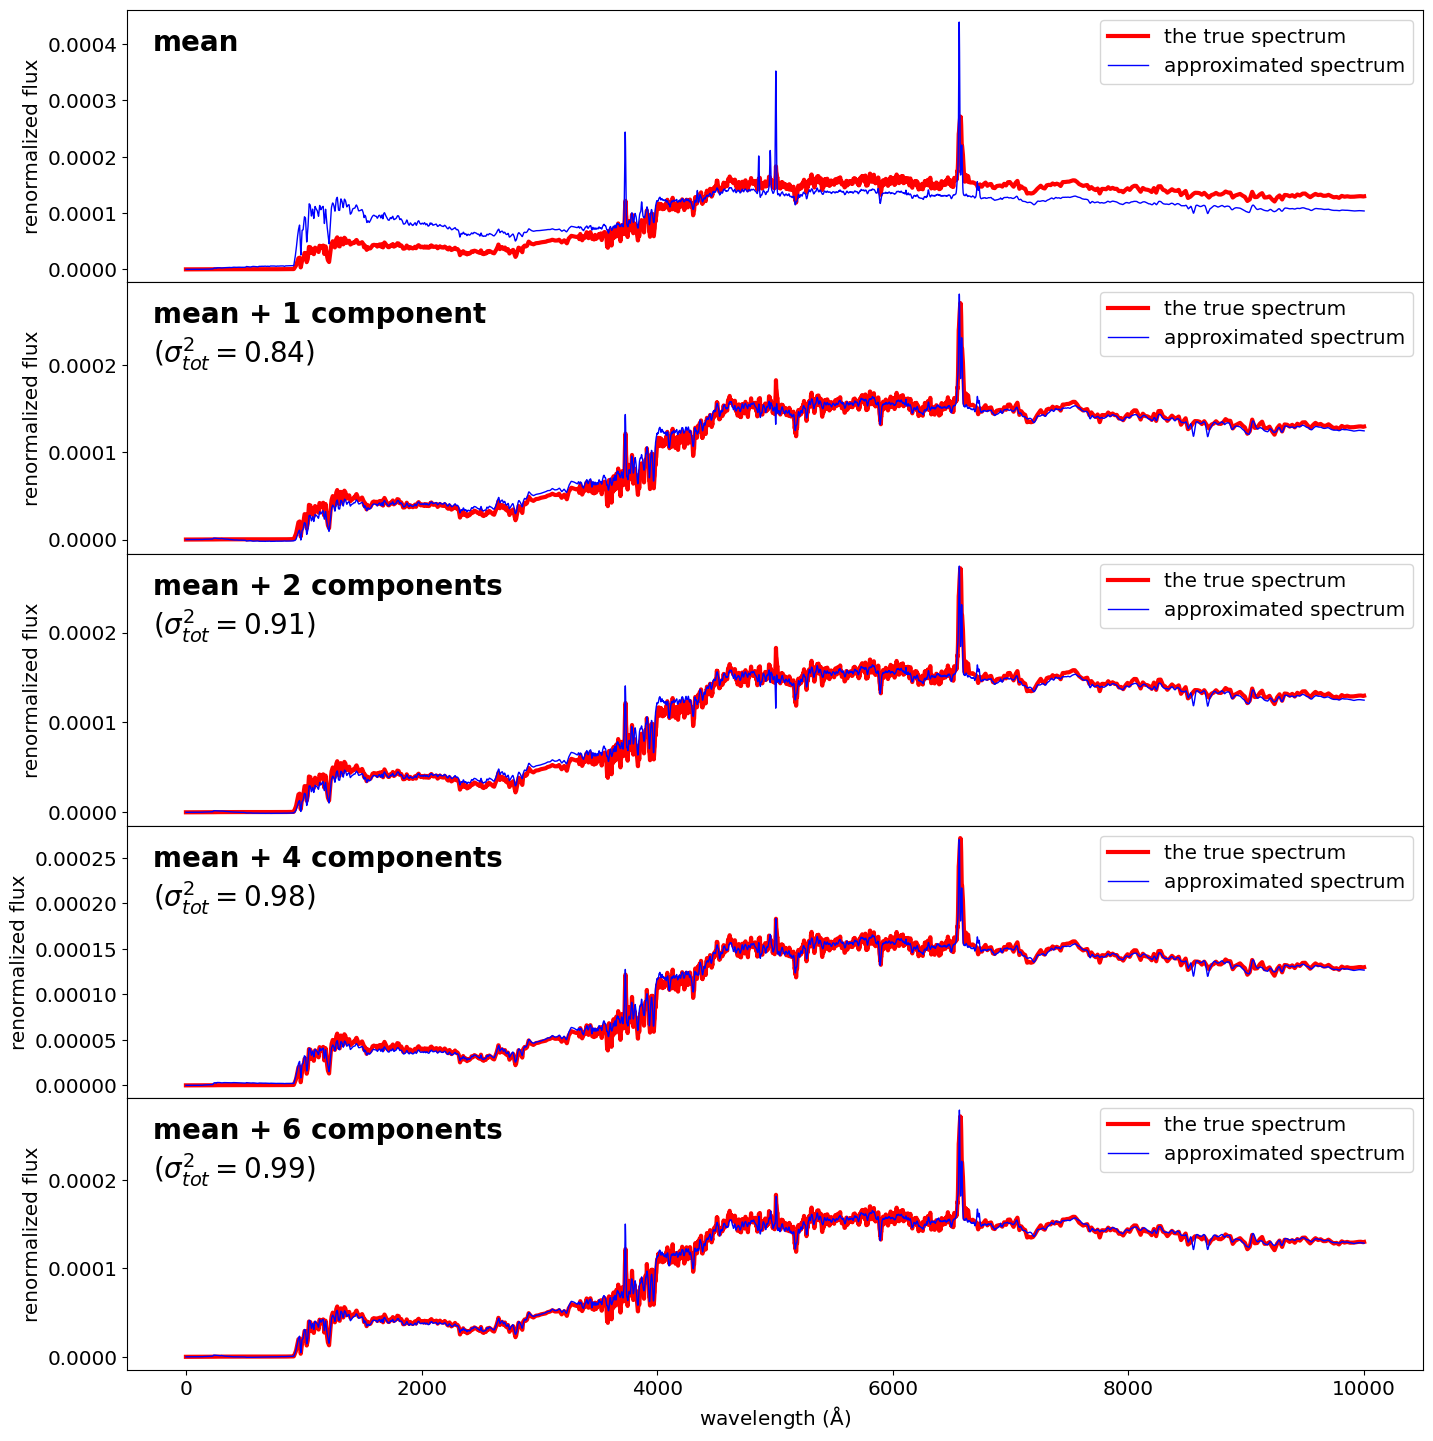

In [23]:
#------------------------------------------------------------
# Find the coefficients of a particular spectrum
idx=0
the_spec = spec[idx,:]
# computation of the coefficients 
coeff = np.dot(evecs, the_spec - spec_mean)
print("coeff",coeff)
# similar to comp = pca.transform(spec)
print("pca_coeffs = ",pca_coeffs[idx,:])

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 1 , 2, 4, 6 ]):
    ax = fig.add_subplot(511 + i)
    ax.plot(wavelengths, the_spec, '-', color='red',lw=3,label="the true spectrum")
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-b',lw=1,label="approximated spectrum")

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    #ax.set_ylim(-2, 21)
    ax.set_ylabel('renormalized flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes,fontsize=20,fontweight="bold")
    ax.legend()

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

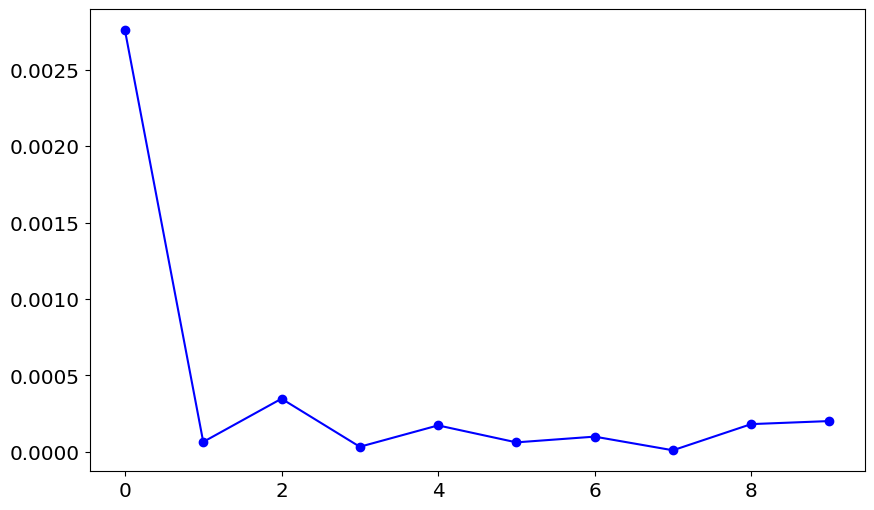

In [24]:
#plt.step(np.arange(len(coeff)),coeff)
plt.plot(range(len(coeff)),np.abs(coeff),'ob-')

### Eigenvalues

The top panel shows the decrease in eigenvalue as a function of the number of eigenvectors, with a break in the distribution at ten eigenvectors. The lower panel shows the cumulative sum of eigenvalues normalized to unity. 

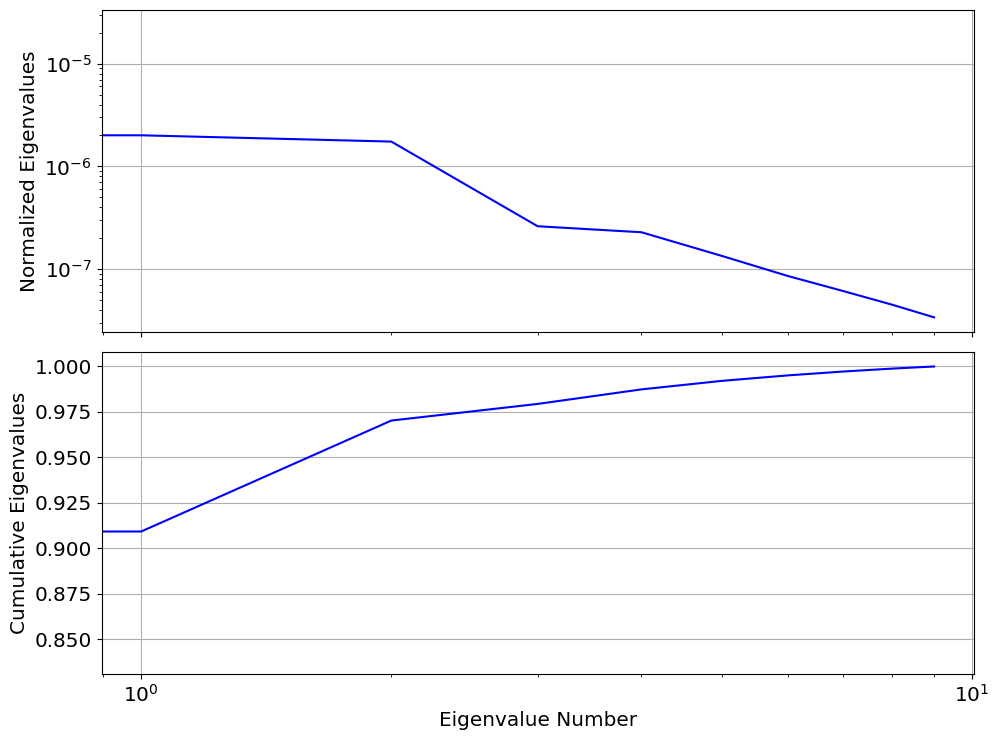

In [25]:
fig = plt.figure(figsize=(10, 7.5))
fig.subplots_adjust(hspace=0.05, bottom=0.12)

ax = fig.add_subplot(211, xscale='log', yscale='log')
ax.grid()
ax.plot(evals, c='b')
ax.set_ylabel('Normalized Eigenvalues')
ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.set_ylim(5E-4, 100)

ax = fig.add_subplot(212, xscale='log')
ax.grid()
ax.semilogx(evals_cs, color='b')
ax.set_xlabel('Eigenvalue Number')
ax.set_ylabel('Cumulative Eigenvalues')
#ax.set_ylim(0.65, 1.00)
plt.tight_layout()
plt.show()


# Compute for all coefficients

### PCA Reconstruction of a spectrum

Reconstruction of spectrum, ${x}(k)$, from the
eigenvectors, ${e}_i(k)$ 

$$  {x}_i(k) = {\mu}(k) + \sum_j^R \theta_{ij} {e}_j(k),$$

Truncating this expansion (i.e., $r<R$)

$$
{x}_i(k) = {\mu}(k) + \sum_i^{r<R} \theta_i {e}_i(k),
$$

- eigenvectors ordered by their associated eigenvalues 
- eigenvalues reflect variance  within each eigenvector (sum of the eigenvalues is total variance of the system).
- project a each spectrum onto these first few eigenspectra is a compression of the data 

This is the sense in which PCA gives for dimensionality reduction.

In [26]:
evecs = pca.components_

In [27]:
#------------------------------------------------------------
# Find the coefficients of a particular spectrum
all_coeff = []
for idx in range(NSED):
    the_spec = spec[idx,:]
    coeff = np.dot(evecs, the_spec - spec_mean)
    all_coeff.append(coeff)
all_coeff=np.vstack(all_coeff)

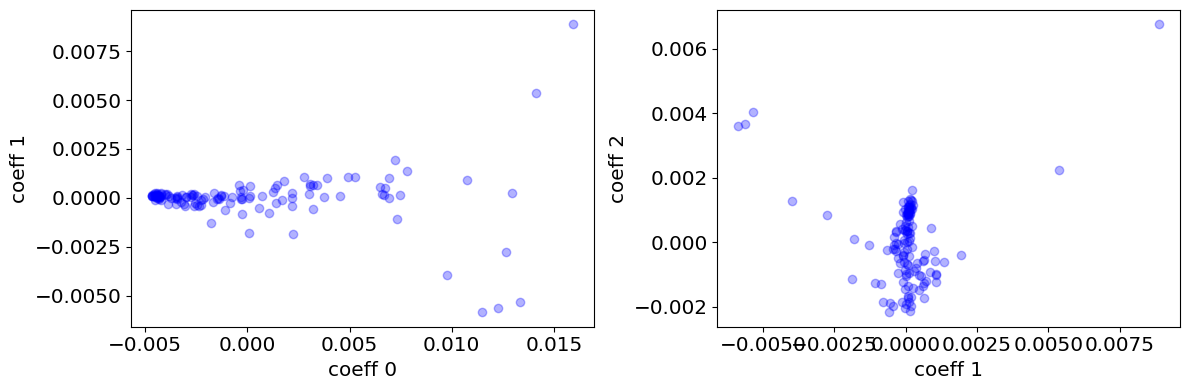

In [28]:
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(1,2,1)
ax.scatter(all_coeff[:,0],all_coeff[:,1],c='b',alpha=0.3)
ax.set_xlabel("coeff 0")
ax.set_ylabel("coeff 1")  
ax=fig.add_subplot(1,2,2)
ax.scatter(all_coeff[:,1],all_coeff[:,2],c='b',alpha=0.3)
ax.set_xlabel("coeff 1")
ax.set_ylabel("coeff 2")
plt.tight_layout()

In [29]:
all_coeff

array([[-2.75877128e-03,  6.39320673e-05,  3.46764039e-04, ...,
         9.14206706e-06,  1.80415232e-04,  2.00436640e-04],
       [ 5.25739594e-03,  1.05272001e-03, -1.24629178e-03, ...,
        -3.36965619e-04,  7.66830791e-05, -8.60333825e-05],
       [ 4.54048440e-03,  7.06115553e-05, -1.73629737e-03, ...,
        -2.61691312e-04, -2.88571996e-05,  5.73370999e-05],
       ...,
       [ 1.41351041e-02,  5.38520424e-03,  2.22640315e-03, ...,
         2.89047074e-04,  2.70427844e-04, -1.20669244e-04],
       [ 9.79208319e-03, -3.96967584e-03,  1.27859354e-03, ...,
         1.52054739e-04, -6.34796020e-04,  9.18889557e-05],
       [ 1.22678553e-02, -5.63123542e-03,  3.67294998e-03, ...,
         2.22889341e-05,  2.07166711e-04, -2.06096296e-05]])

In [30]:
pca_coeffs 

array([[-2.75877128e-03,  6.39320673e-05,  3.46764039e-04, ...,
         9.14206706e-06,  1.80415232e-04,  2.00436640e-04],
       [ 5.25739594e-03,  1.05272001e-03, -1.24629178e-03, ...,
        -3.36965619e-04,  7.66830791e-05, -8.60333825e-05],
       [ 4.54048440e-03,  7.06115553e-05, -1.73629737e-03, ...,
        -2.61691312e-04, -2.88571996e-05,  5.73370999e-05],
       ...,
       [ 1.41351041e-02,  5.38520424e-03,  2.22640315e-03, ...,
         2.89047074e-04,  2.70427844e-04, -1.20669244e-04],
       [ 9.79208319e-03, -3.96967584e-03,  1.27859354e-03, ...,
         1.52054739e-04, -6.34796020e-04,  9.18889557e-05],
       [ 1.22678553e-02, -5.63123542e-03,  3.67294998e-03, ...,
         2.22889341e-05,  2.07166711e-04, -2.06096296e-05]])

## Save a coefficient in a fits file

In [31]:
filename_out = "pcamethod1_Brown_eigenvectorandcoeff.fits"
hdr = fits.Header()
hdr["COMMENT"] = "PCA method 1 spectra coefficients"
hdr2 = fits.Header()
hdr2["COMMENT"] = "PCA method 1 Eigen Vectors"

In [32]:
primary_hdu = fits.PrimaryHDU(data_in,hdr_in)
image_hdu = fits.ImageHDU(all_coeff,hdr)
image_hdu2 = fits.ImageHDU(pca.components_,hdr2)

In [33]:
hdul = fits.HDUList([primary_hdu, image_hdu, image_hdu2])

In [34]:
hdul.writeto(filename_out,overwrite=True)